In [1]:
import Pkg
Pkg.activate(@__DIR__)

  Activating project at `c:\Users\Arnau\Documents\HORS_JEUX\stage\2025_Internship_SWG_Pomme\AR`


In [2]:
##Folder to print results
folder_results = "Results_multiple/NantesTN_TX"
folder_station = "../mystations"
##Station
file = [folder_station * "/" * typedata * "_Nantes.txt" for typedata in ["TN", "TX"]]

##AR model
p = 3
method_ = "monthly"
periodicity_model = "trigo"       # "trigo", "smooth", "autotrigo", "stepwise_trigo"
degree_period = 2                     # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
Trendtype = "LOESS"                   # "LOESS", "polynomial", "null" (for no additive trend)
trendparam = 0.16                  # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1
σ_periodicity_model = "trigo"     # "trigo", "smooth", "autotrigo", "stepwise_trigo", "null" (for no multiplicative periodicity)
σ_degree_period = 2                   # 0 => default value -> "trigo" : 5, "smooth" : 9, "autotrigo" : 50, "stepwise_trigo" : 50
σ_Trendtype = "LOESS"                 # "LOESS", "polynomial", "null" (for no multiplicative trend)
σ_trendparam = 0.16                # nothing => default value -> "LOESS" : 0.08, "polynomial" : 1

##Simulations
n = 1000

1000

In [3]:
include("table_reader.jl")
include("utils/Missing_values.jl")
include("utils/Structure.jl")
include("utils/Plotting.jl")
cd(@__DIR__)

In [4]:
settings = OrderedDict((("file", file),
    ("p", p),
    ("method_", method_),
    ("periodicity_model", periodicity_model),
    ("degree_period", degree_period),
    ("Trendtype", Trendtype),
    ("trendparam", trendparam),
    ("σ_periodicity_model", σ_periodicity_model),
    ("σ_degree_period", σ_degree_period),
    ("σ_Trendtype", σ_Trendtype),
    ("σ_trendparam", σ_trendparam),
    ("n", n)))

OrderedDict{String, Any} with 12 entries:
  "file"                => ["../mystations/TN_Nantes.txt", "../mystations/TX_Na…
  "p"                   => 3
  "method_"             => "monthly"
  "periodicity_model"   => "trigo"
  "degree_period"       => 2
  "Trendtype"           => "LOESS"
  "trendparam"          => 0.16
  "σ_periodicity_model" => "trigo"
  "σ_degree_period"     => 2
  "σ_Trendtype"         => "LOESS"
  "σ_trendparam"        => 0.16
  "n"                   => 1000

In [5]:
series_vec = truncate_MV.(extract_series.(file))
date_vec, x = Common_indexes(series_vec)

Caracteristics_Series_vec = init_CaracteristicsSeries.(series_vec)

2-element Vector{CaracteristicsSeries}:
 CaracteristicsSeries([3.2470588235294113, 3.9411764705882355, 3.3588235294117648, 3.414705882352941, 3.711764705882353, 3.258823529411765, 3.035294117647059, 4.385294117647059, 3.8676470588235294, 3.8794117647058823  …  5.554545454545453, 4.866666666666667, 5.081818181818181, 4.803030303030304, 3.5212121212121215, 3.16060606060606, 2.8515151515151516, 2.5606060606060606, 3.5878787878787874, 4.172727272727272], [12.1, 11.5, 11.5, 11.2, 11.7, 11.3, 10.7, 11.0, 12.1, 12.0  …  13.4, 13.0, 11.8, 11.3, 11.4, 10.6, 12.3, 11.3, 12.2, 14.3], 12×4 DataFrame
 Row │ MONTH  MONTHLY_MEAN  MONTHLY_STD  MONTHLY_MAX 
     │ Int64  Float64       Float64      Float64     
─────┼───────────────────────────────────────────────
   1 │     1       3.36195      4.40412         12.8
   2 │     2       3.38714      4.12052         12.6
   3 │     3       4.9262       3.59028         12.6
   4 │     4       6.60465      3.25887         15.0
   5 │     5       9.90225     

In [6]:
# println(date_vec[1])
# println(date_vec[end])

In [7]:
# Model = fit_Multi_AR(x, date_vec,
#     p=p,
#     method_=method_,
#     periodicity_model=periodicity_model,
#     degree_period=degree_period,
#     Trendtype=Trendtype,
#     trendparam=trendparam,
#     σ_periodicity_model=σ_periodicity_model,
#     σ_degree_period=σ_degree_period,
#     σ_Trendtype=σ_Trendtype,
#     σ_trendparam=σ_trendparam)
    
# save_model(Model, folder_results * "/model_NantesTN_TX_p3_k2.jld2")

Model = load_model(folder_results * "/model_NantesTN_TX_p3_k2.jld2")

Multi_MonthlyAR([[[0.2931647102276538 0.6125234301759169; -0.009717925175546942 0.795640805752748], [-0.02025048882387015 -0.11499350367742882; -0.0019152745429806906 -0.015465479660181513], [0.005822143951423214 0.0013150897952843414; -0.024189573862480593 0.03712053313185688]], [[0.39960152047941117 0.5002284534191791; -0.04889749508724583 0.7642862501040331], [0.03634372420115266 -0.11829154464980342; -0.0071212040757733805 0.029607828382814734], [0.025442965181458357 -0.0367462960204783; 0.020026449360515054 0.04153119920466674]], [[0.4298945584291365 0.3976458606794755; -0.009648330908790258 0.6841391874310906], [0.04869876347287298 -0.08275569502747199; -0.06282847386301628 0.02949345146621001], [0.005921971472558051 -0.013815100701819258; 0.017621867914752714 0.03533720905898626]], [[0.4399721399995715 0.39189399350469595; 0.04292240637474159 0.7565005873010251], [-0.023580202608764738 -0.048144734238078614; 0.02264986598374099 -0.11362953882131882], [0.062232567639402846 -0.080

In [8]:
sample_ = rand(Model, n)

1000-element Vector{Matrix{Float64}}:
 [0.9000000000000004 4.4; -1.3999999999999995 3.2; … ; 5.058379380448423 7.208049127621745; 2.4639721571621314 7.76238977345153]
 [0.9000000000000004 4.4; -1.3999999999999995 3.2; … ; 1.5599623203050337 8.507137643661391; 0.3623885842091146 10.793909070347247]
 [0.9000000000000004 4.4; -1.3999999999999995 3.2; … ; 1.8850578525463297 8.694161779045348; 3.308662310612208 9.210247524791605]
 [0.9000000000000004 4.4; -1.3999999999999995 3.2; … ; 2.961425480370119 6.7954845879168335; 6.648223124036268 8.824934274251524]
 [0.9000000000000004 4.4; -1.3999999999999995 3.2; … ; 5.613909811712767 11.651986689916457; 5.604349818070075 11.36863222442964]
 [0.9000000000000004 4.4; -1.3999999999999995 3.2; … ; -0.5297901355888879 4.354863136520602; 0.9631414137658747 6.918222089739698]
 [0.9000000000000004 4.4; -1.3999999999999995 3.2; … ; 7.735850656653431 14.421593173063908; 10.296696814752831 15.441598657972444]
 [0.9000000000000004 4.4; -1.3999999999999995 3

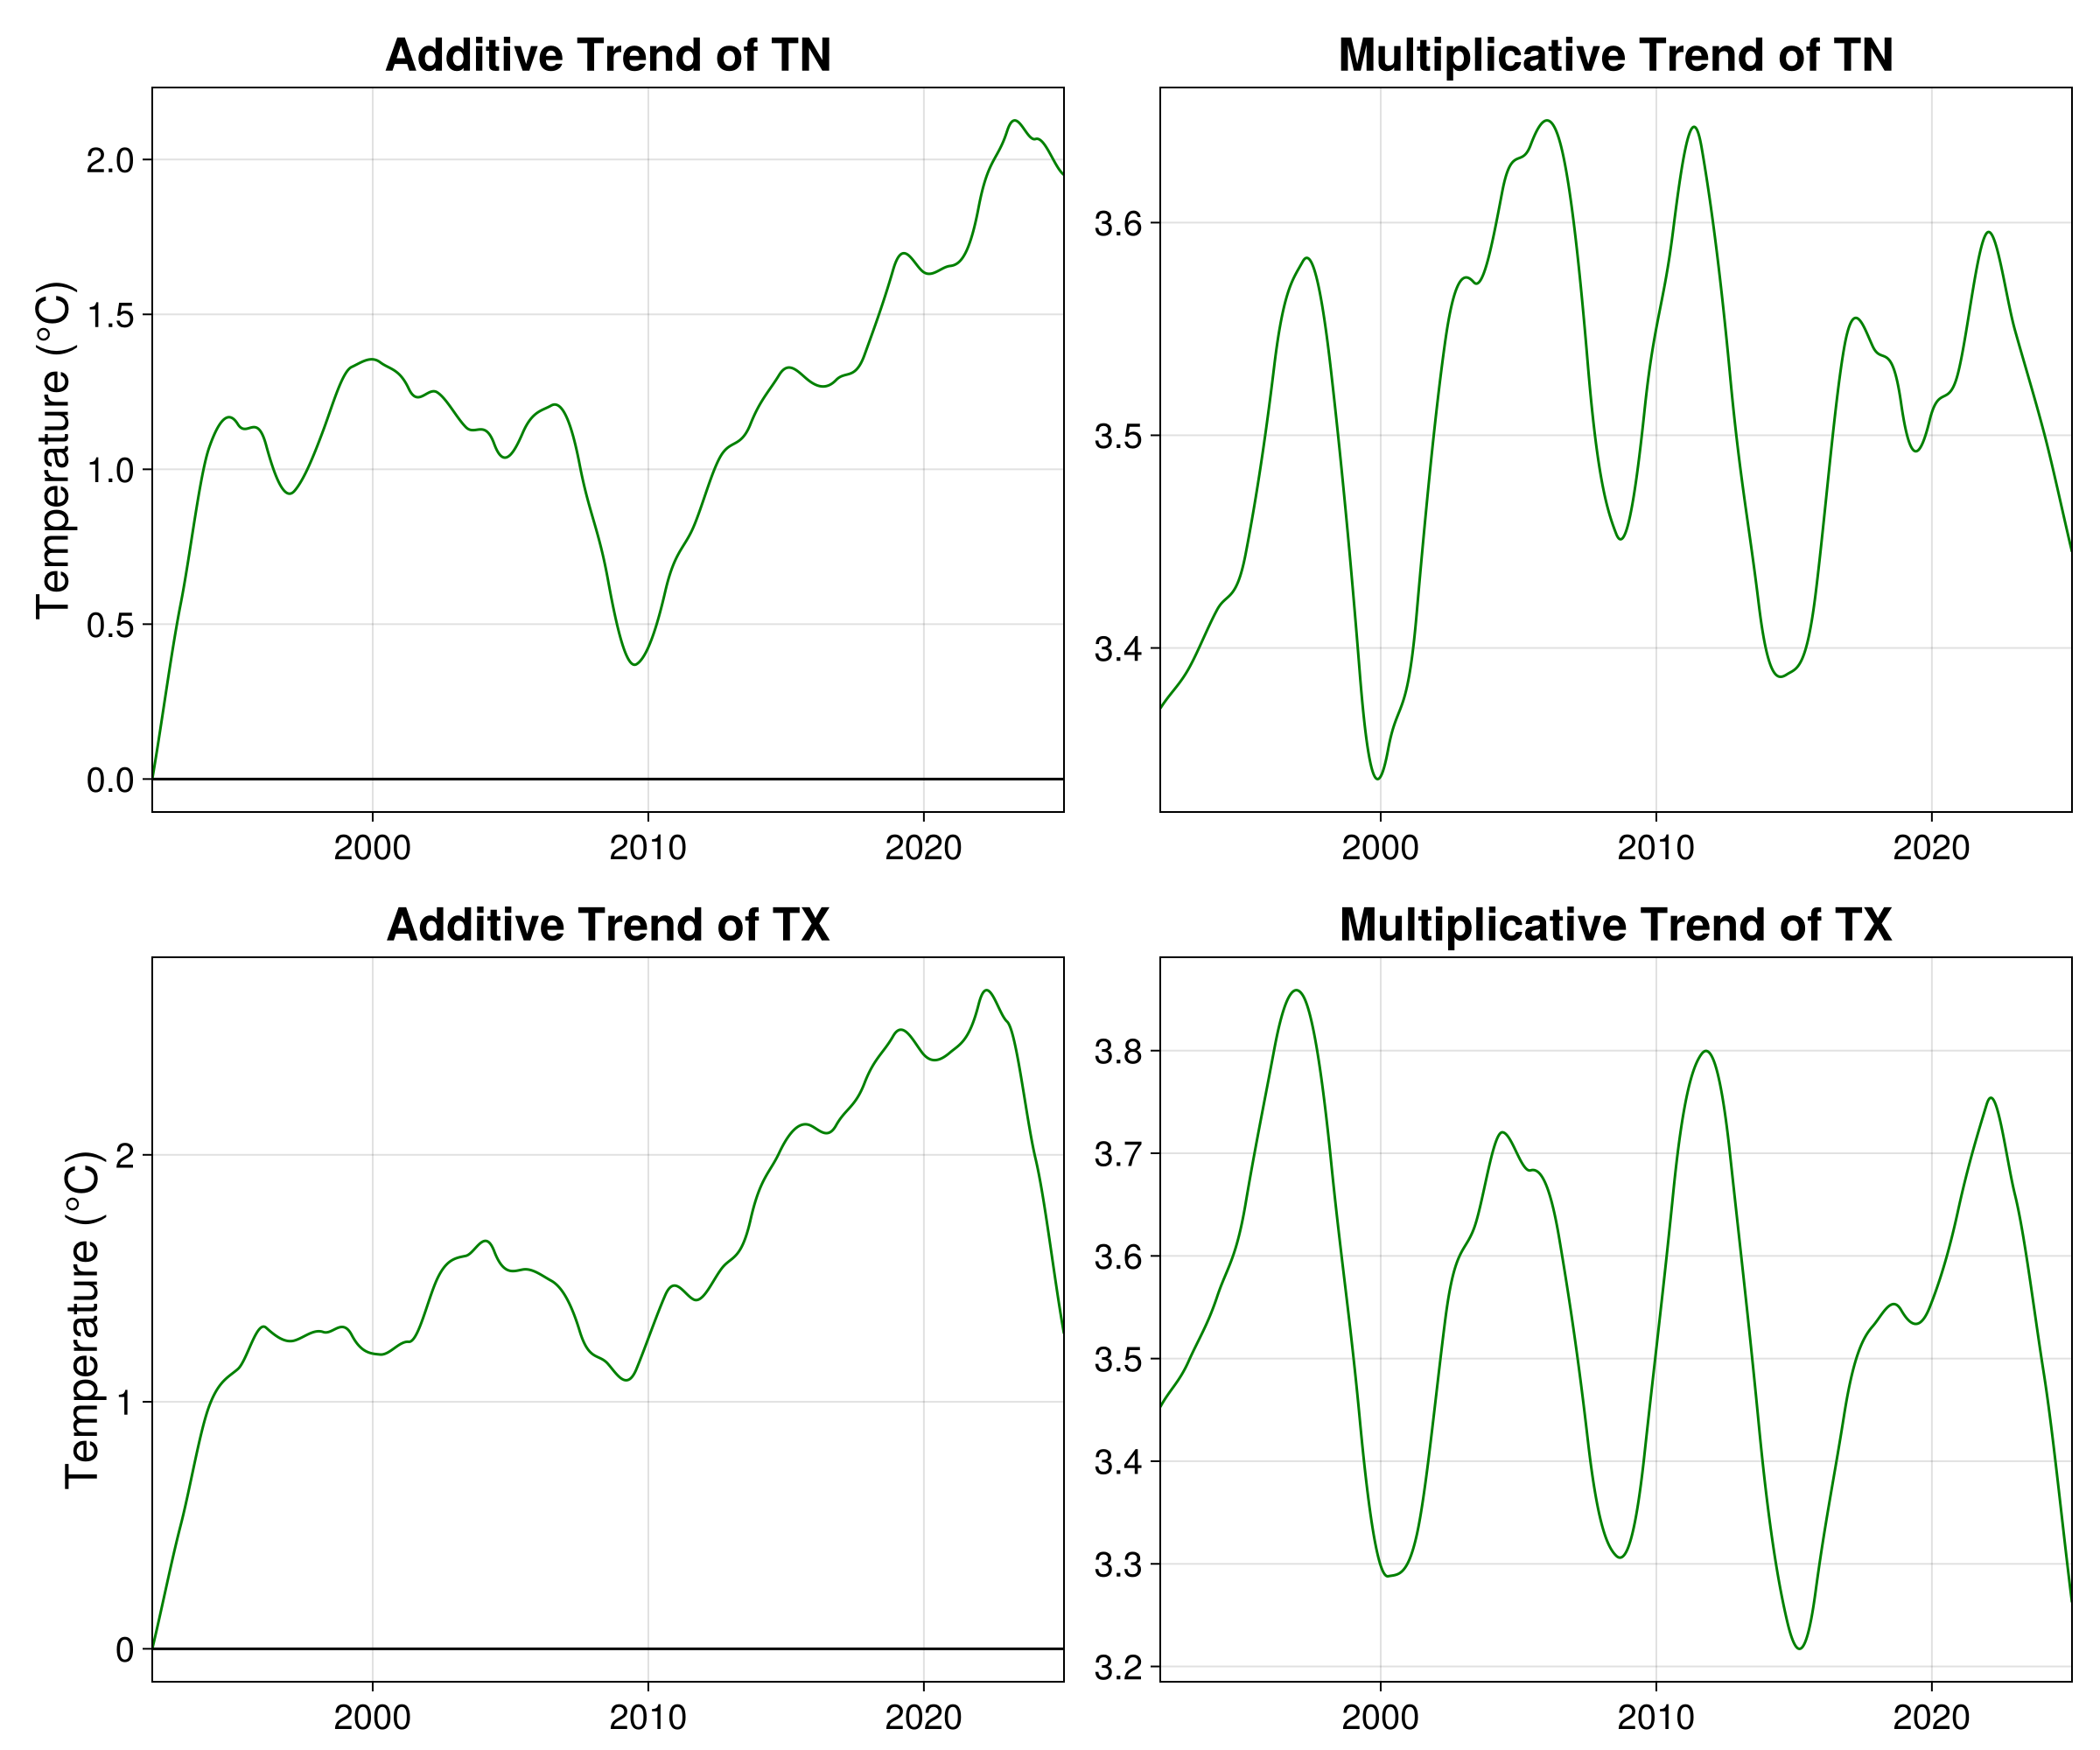

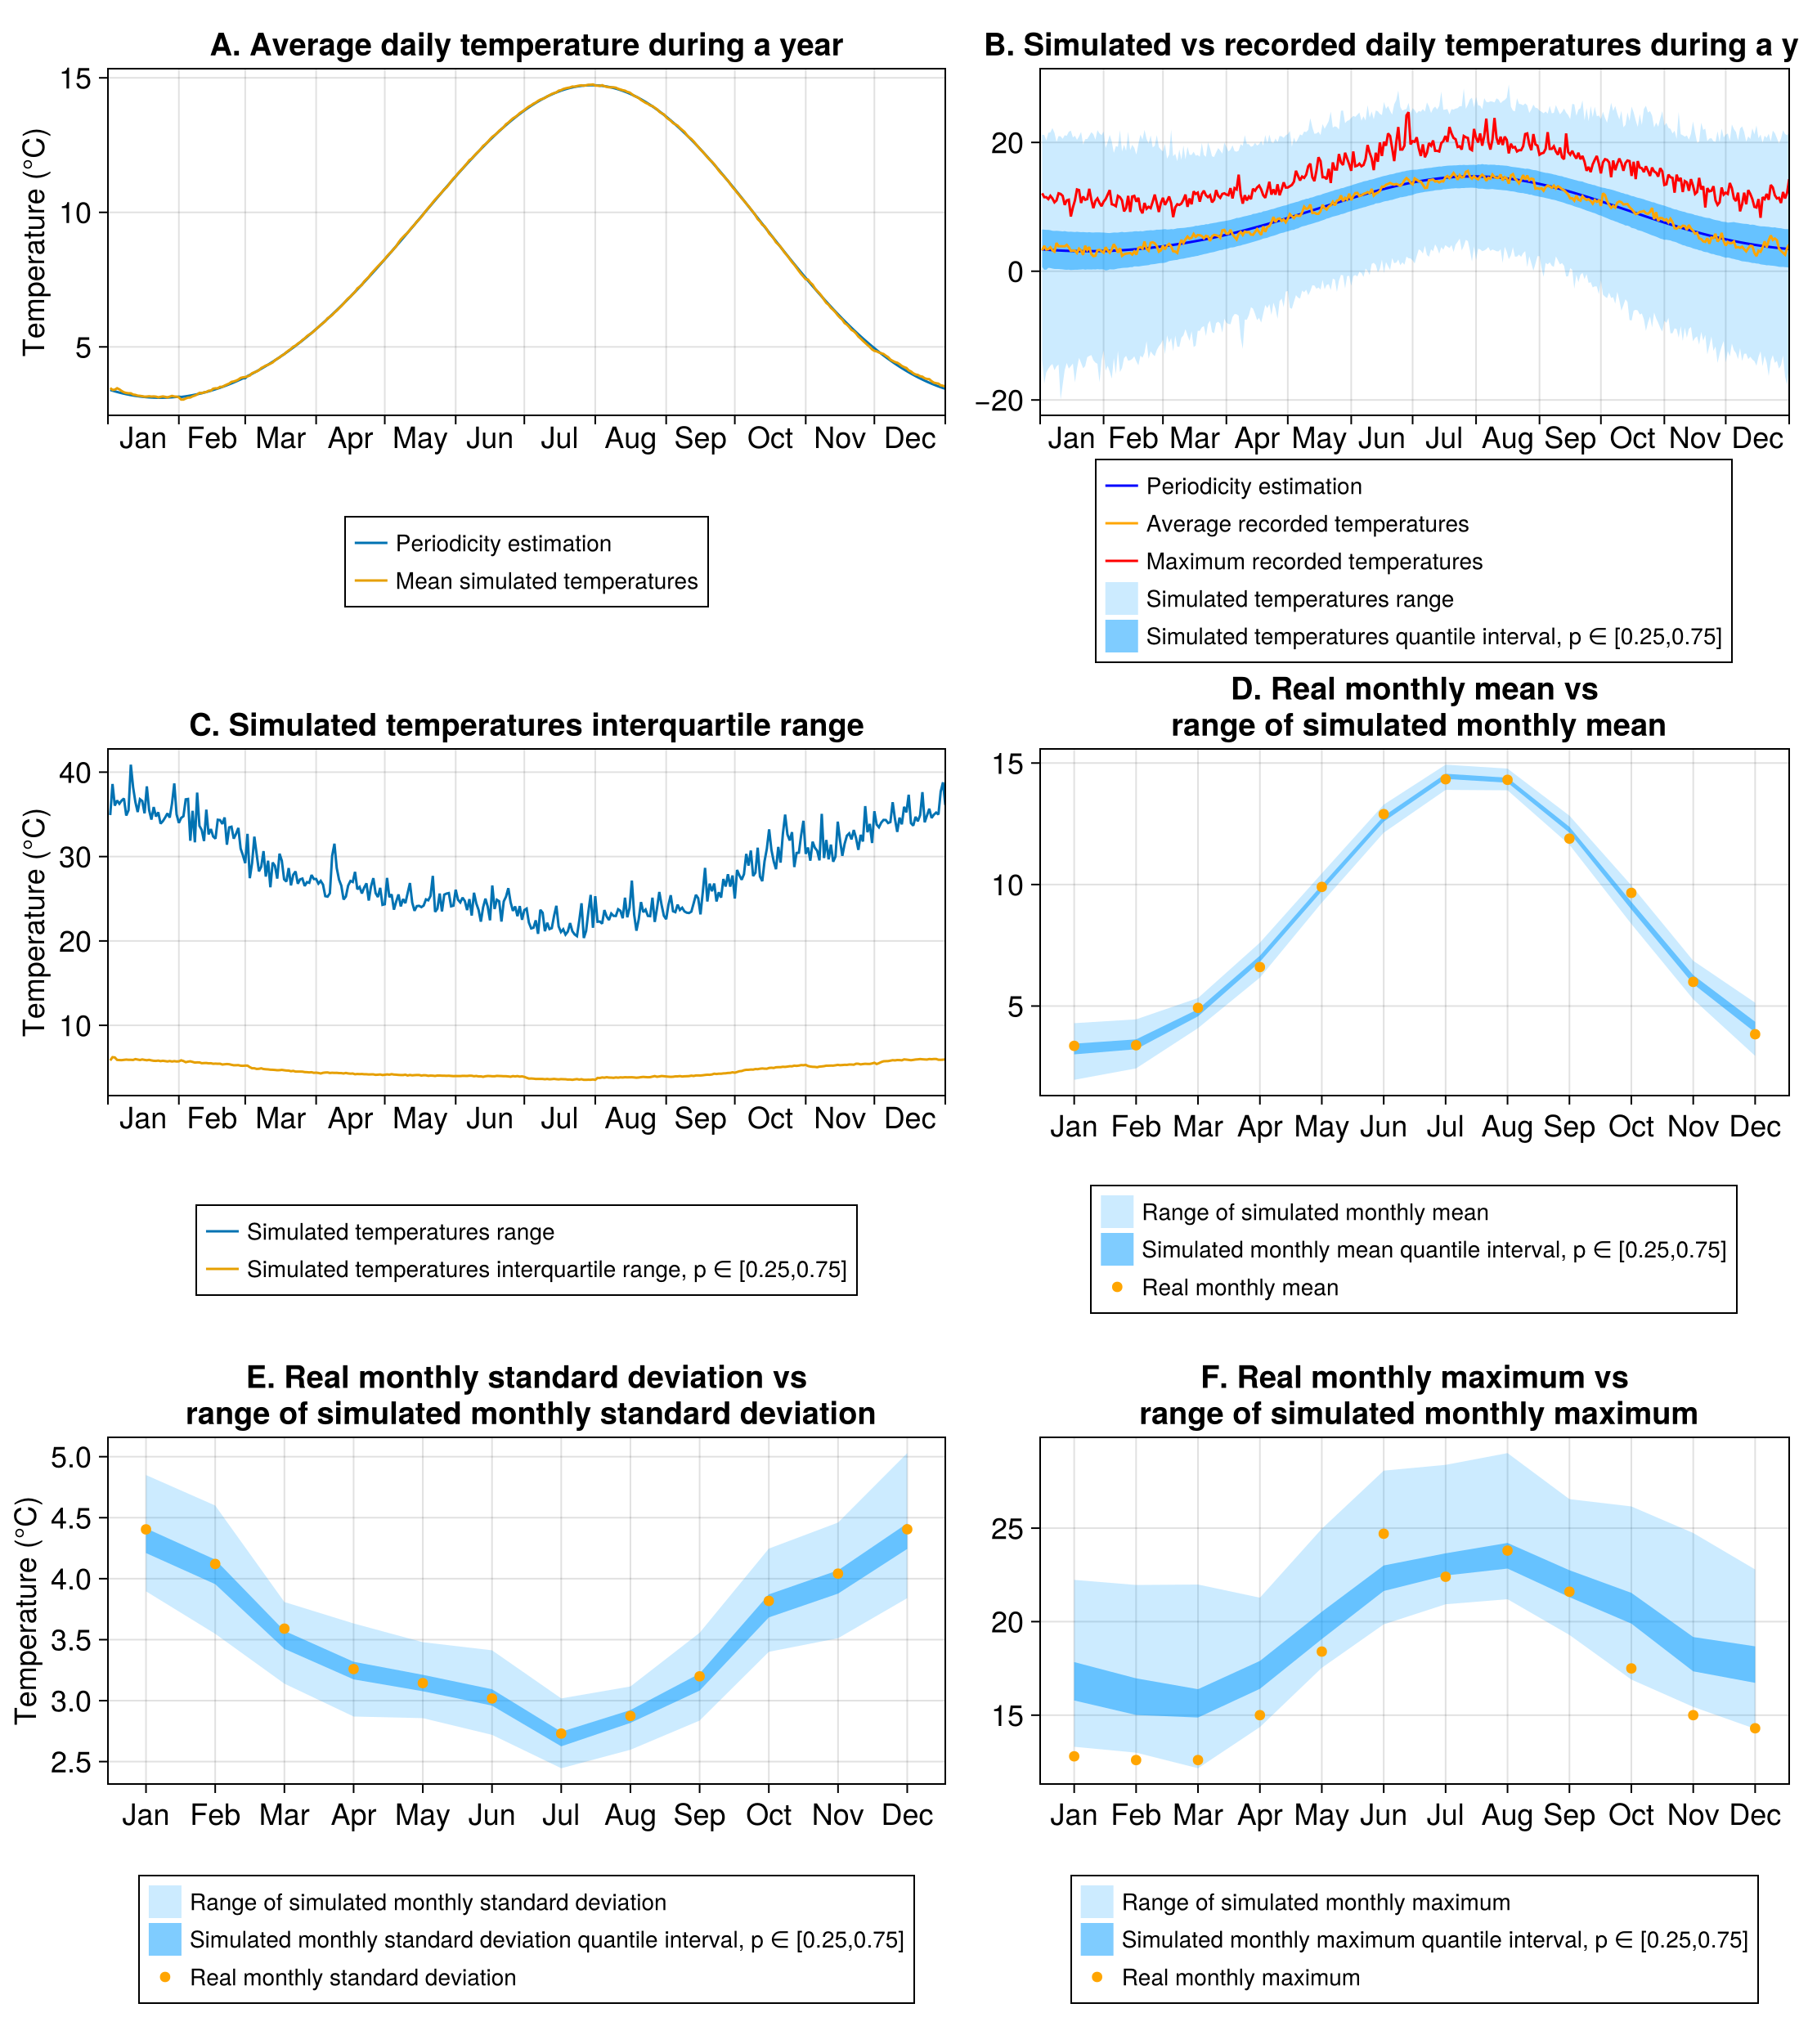

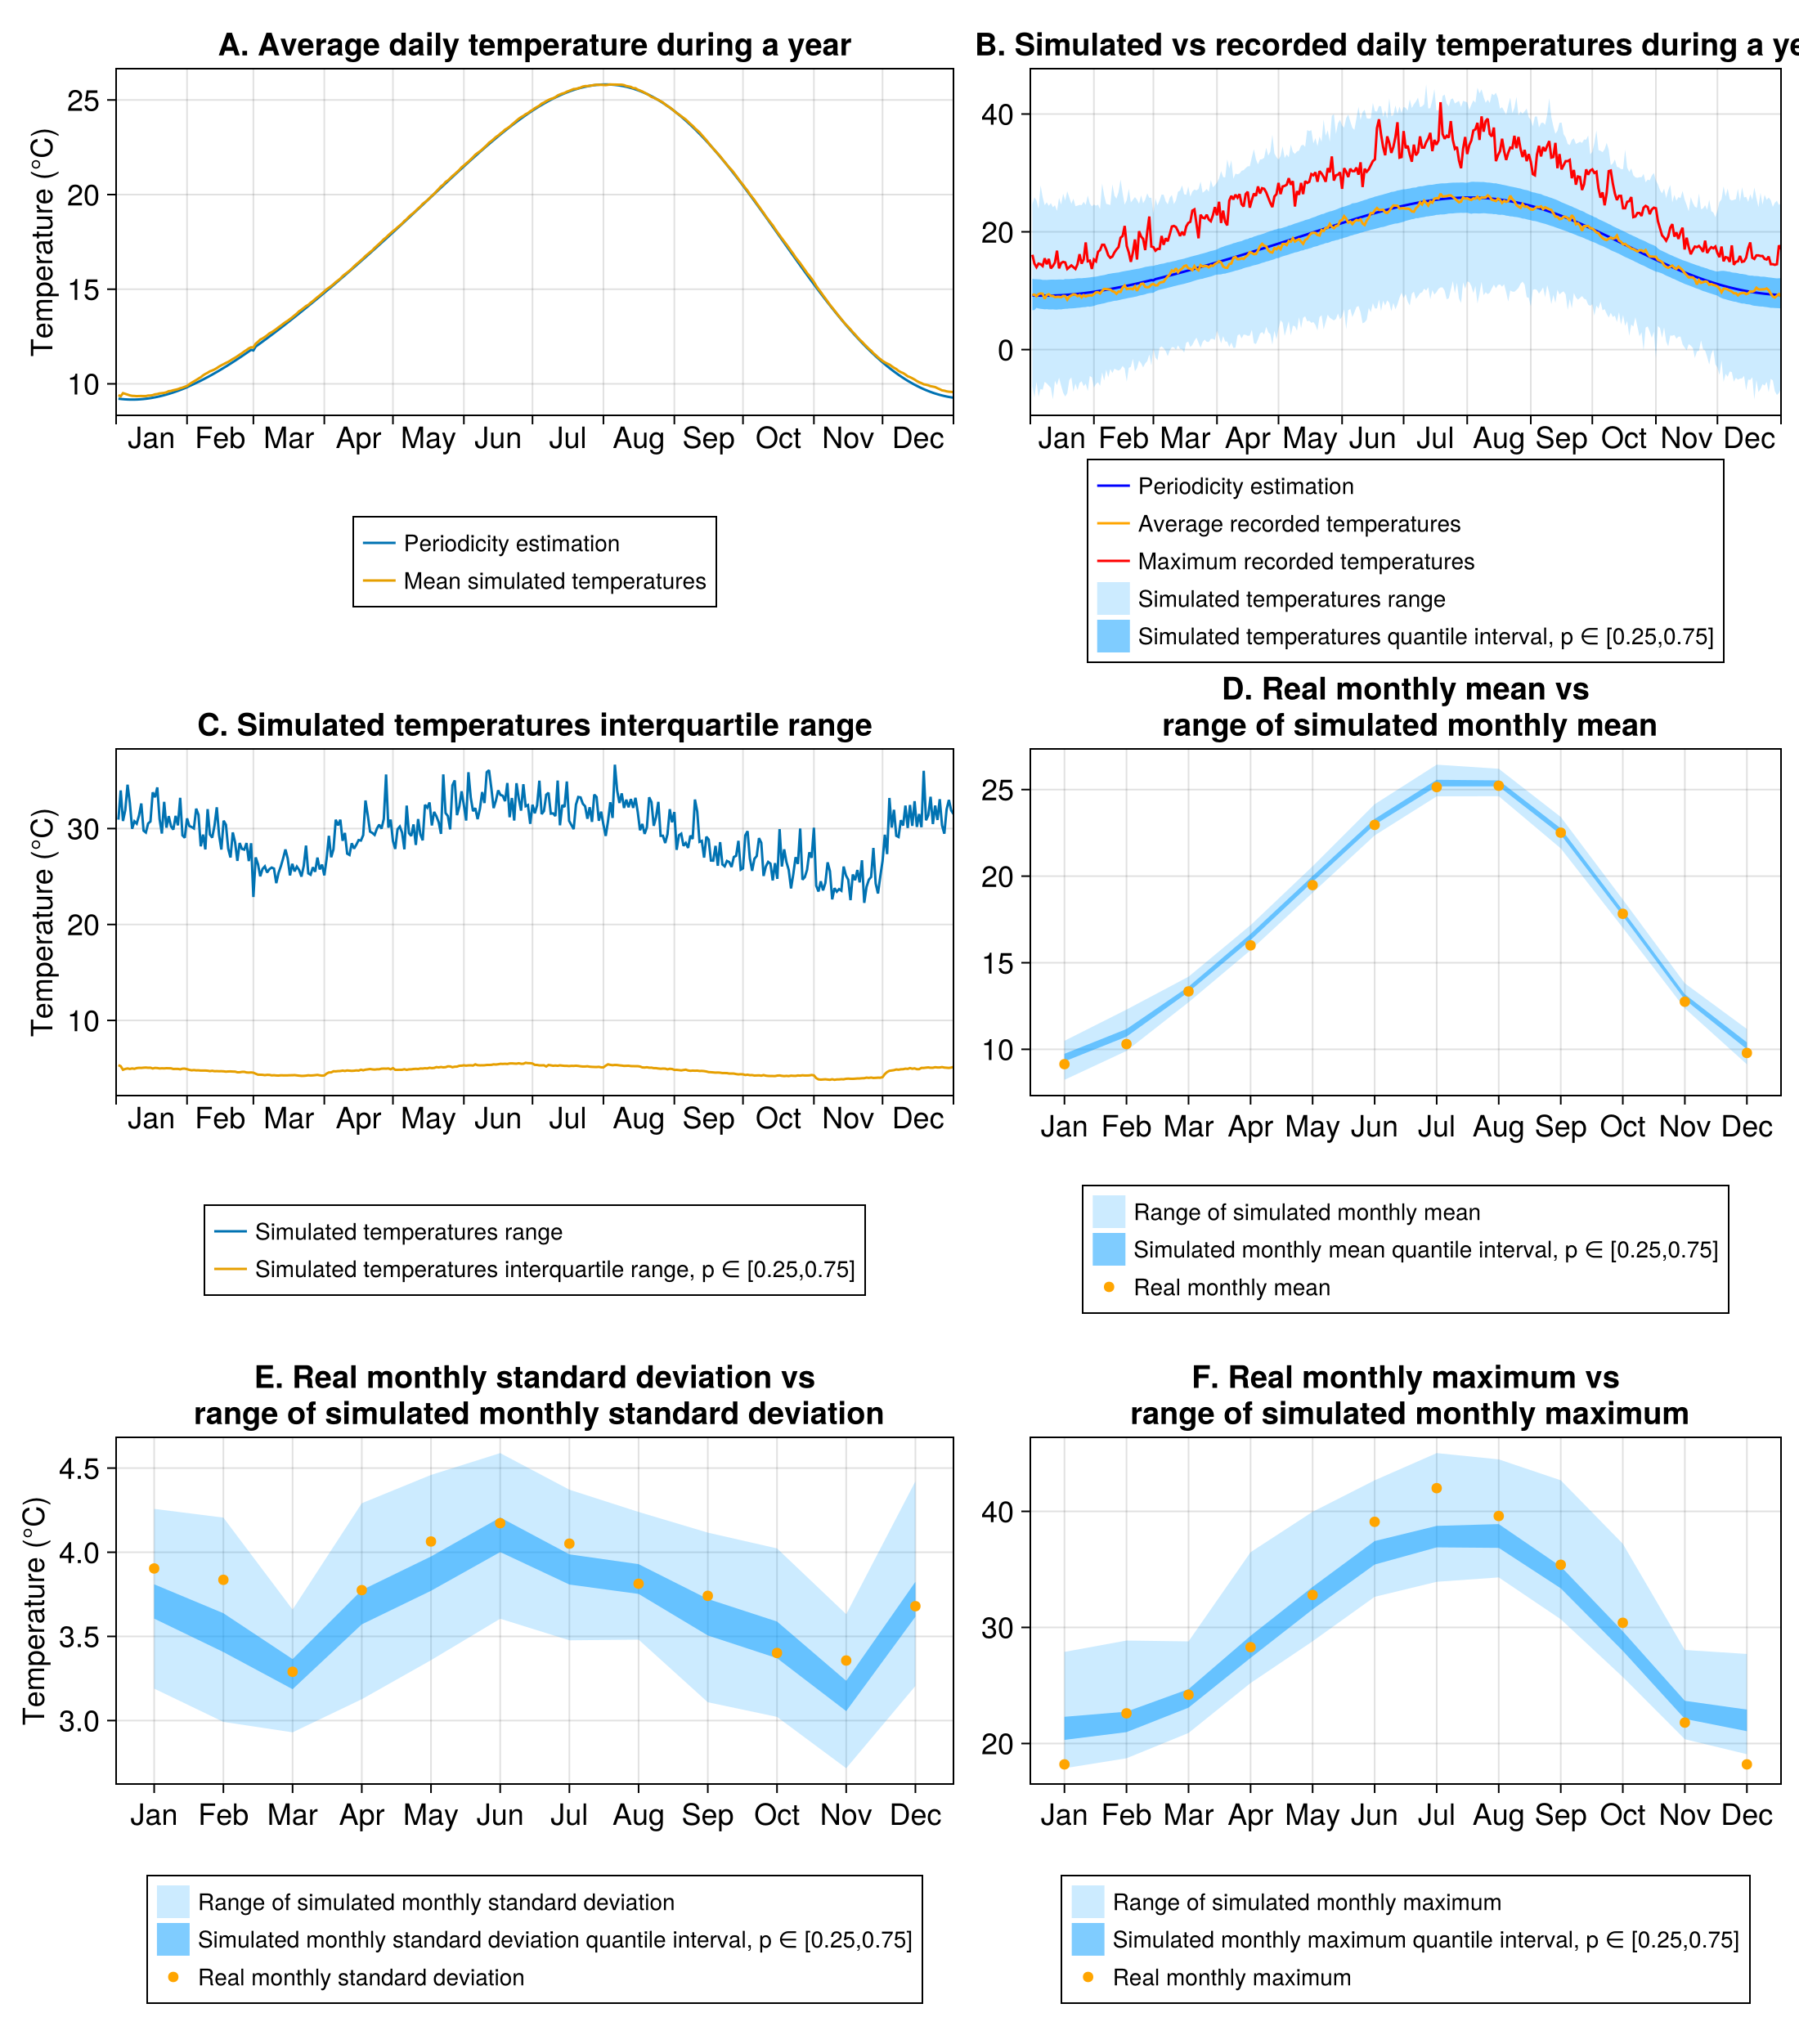

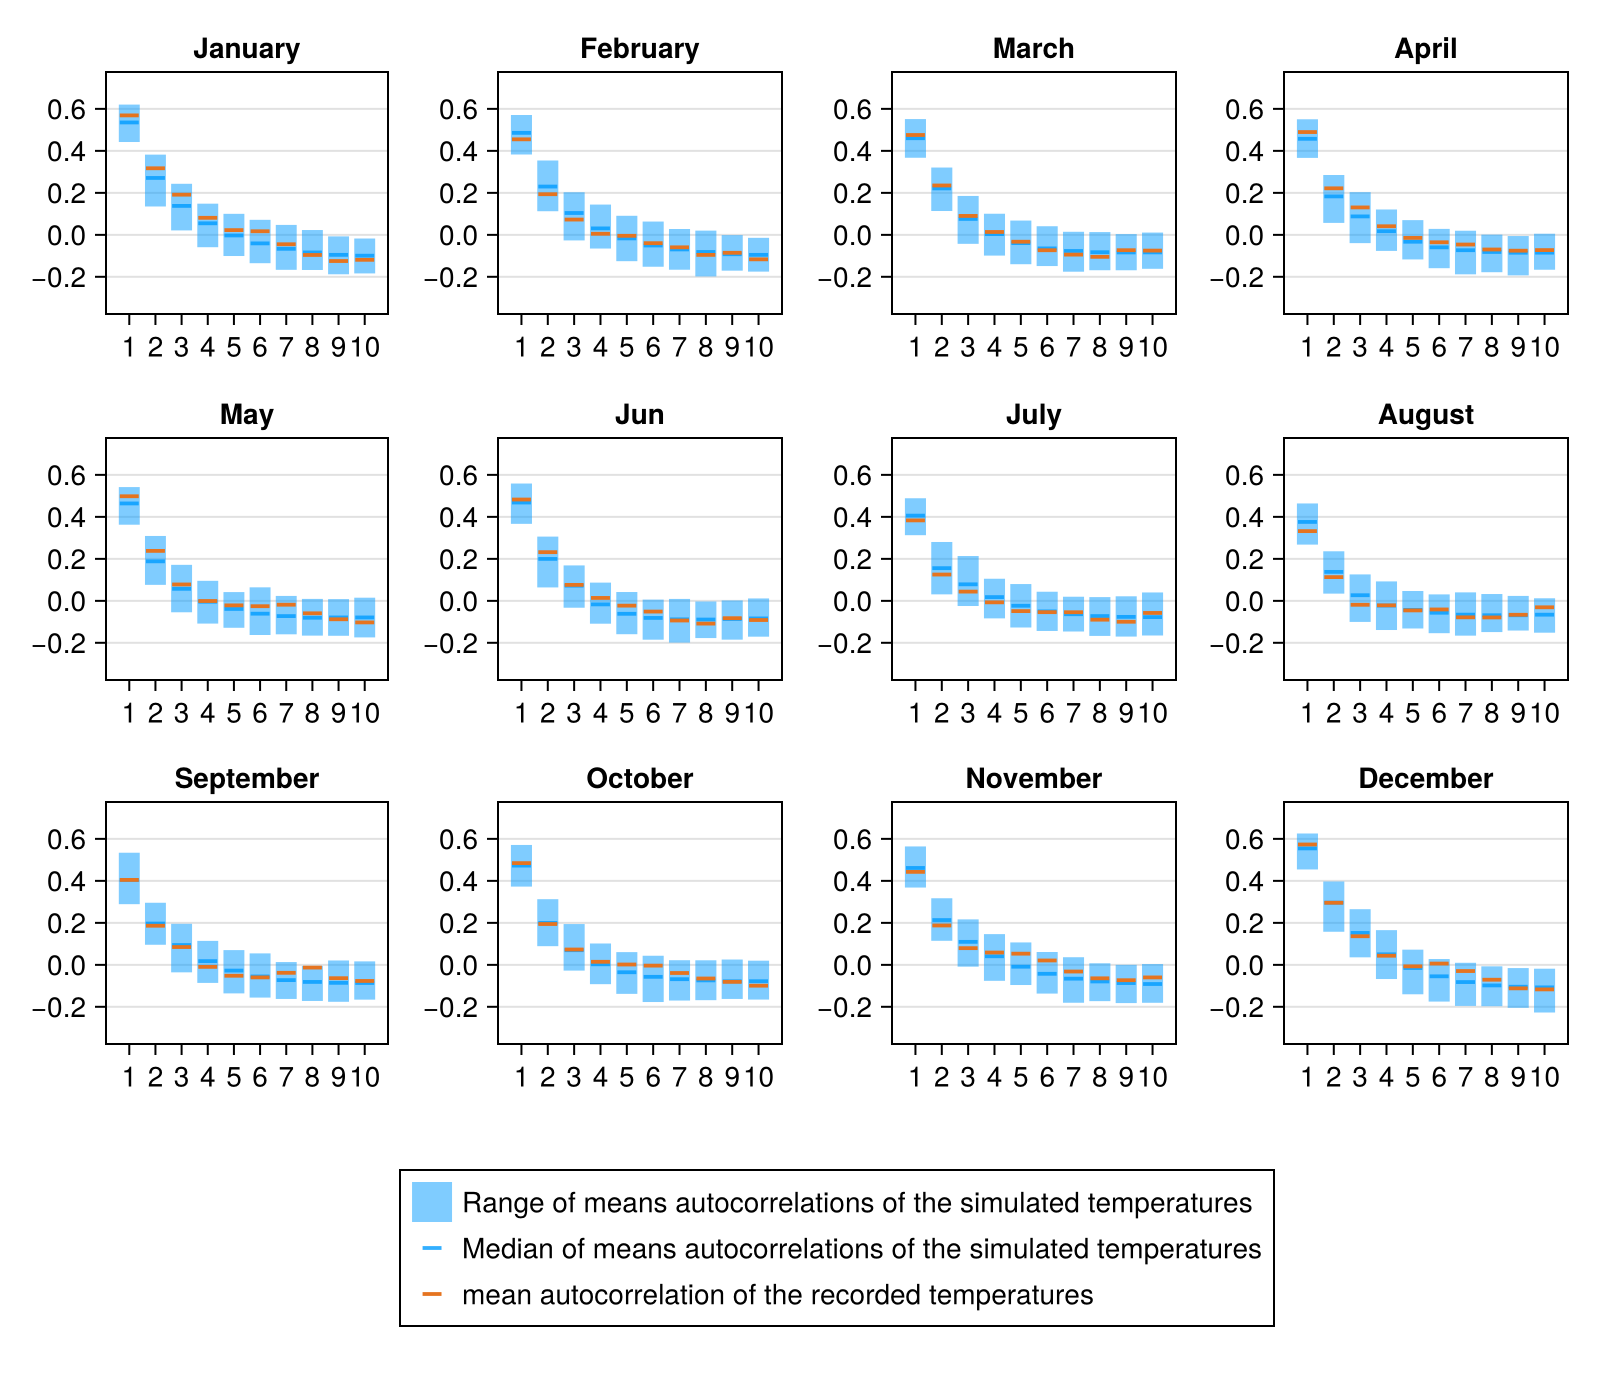

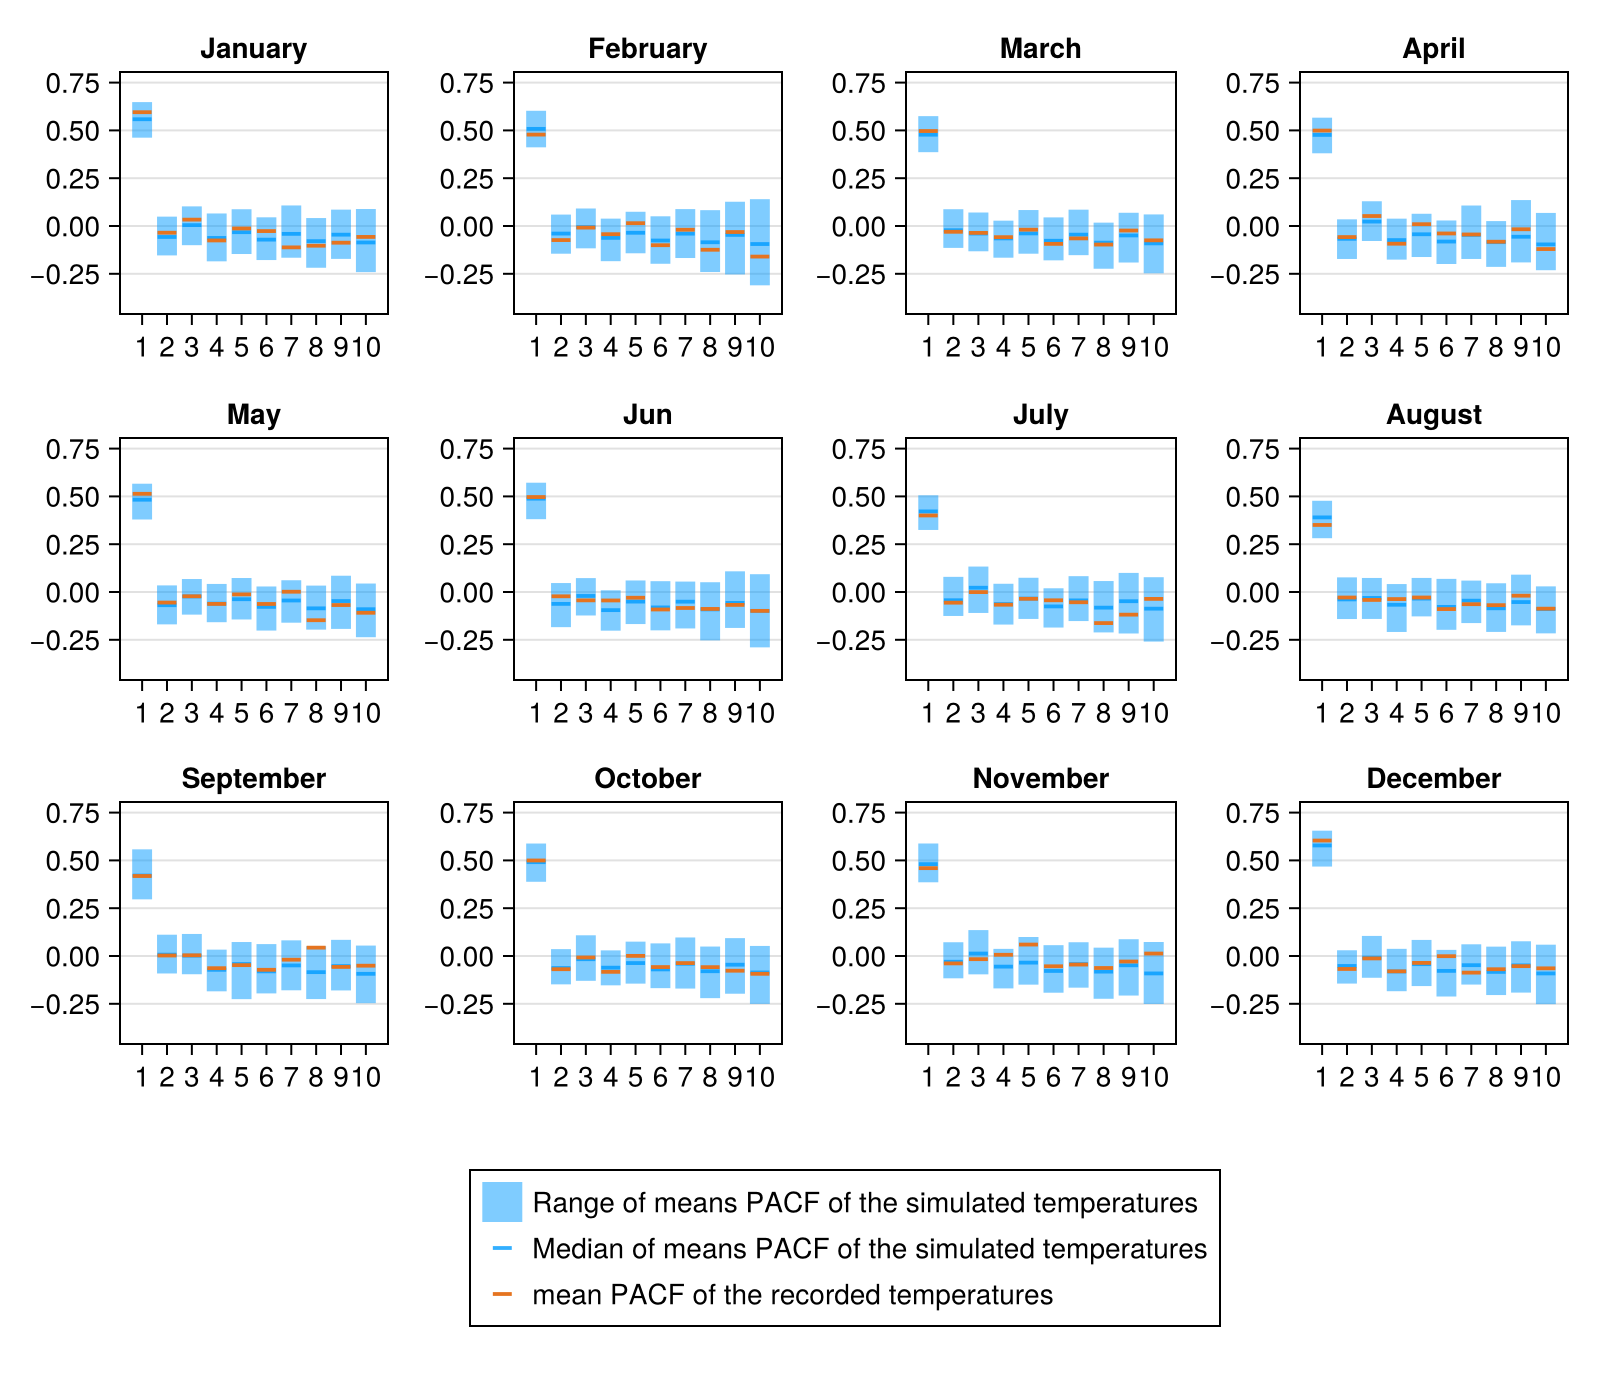

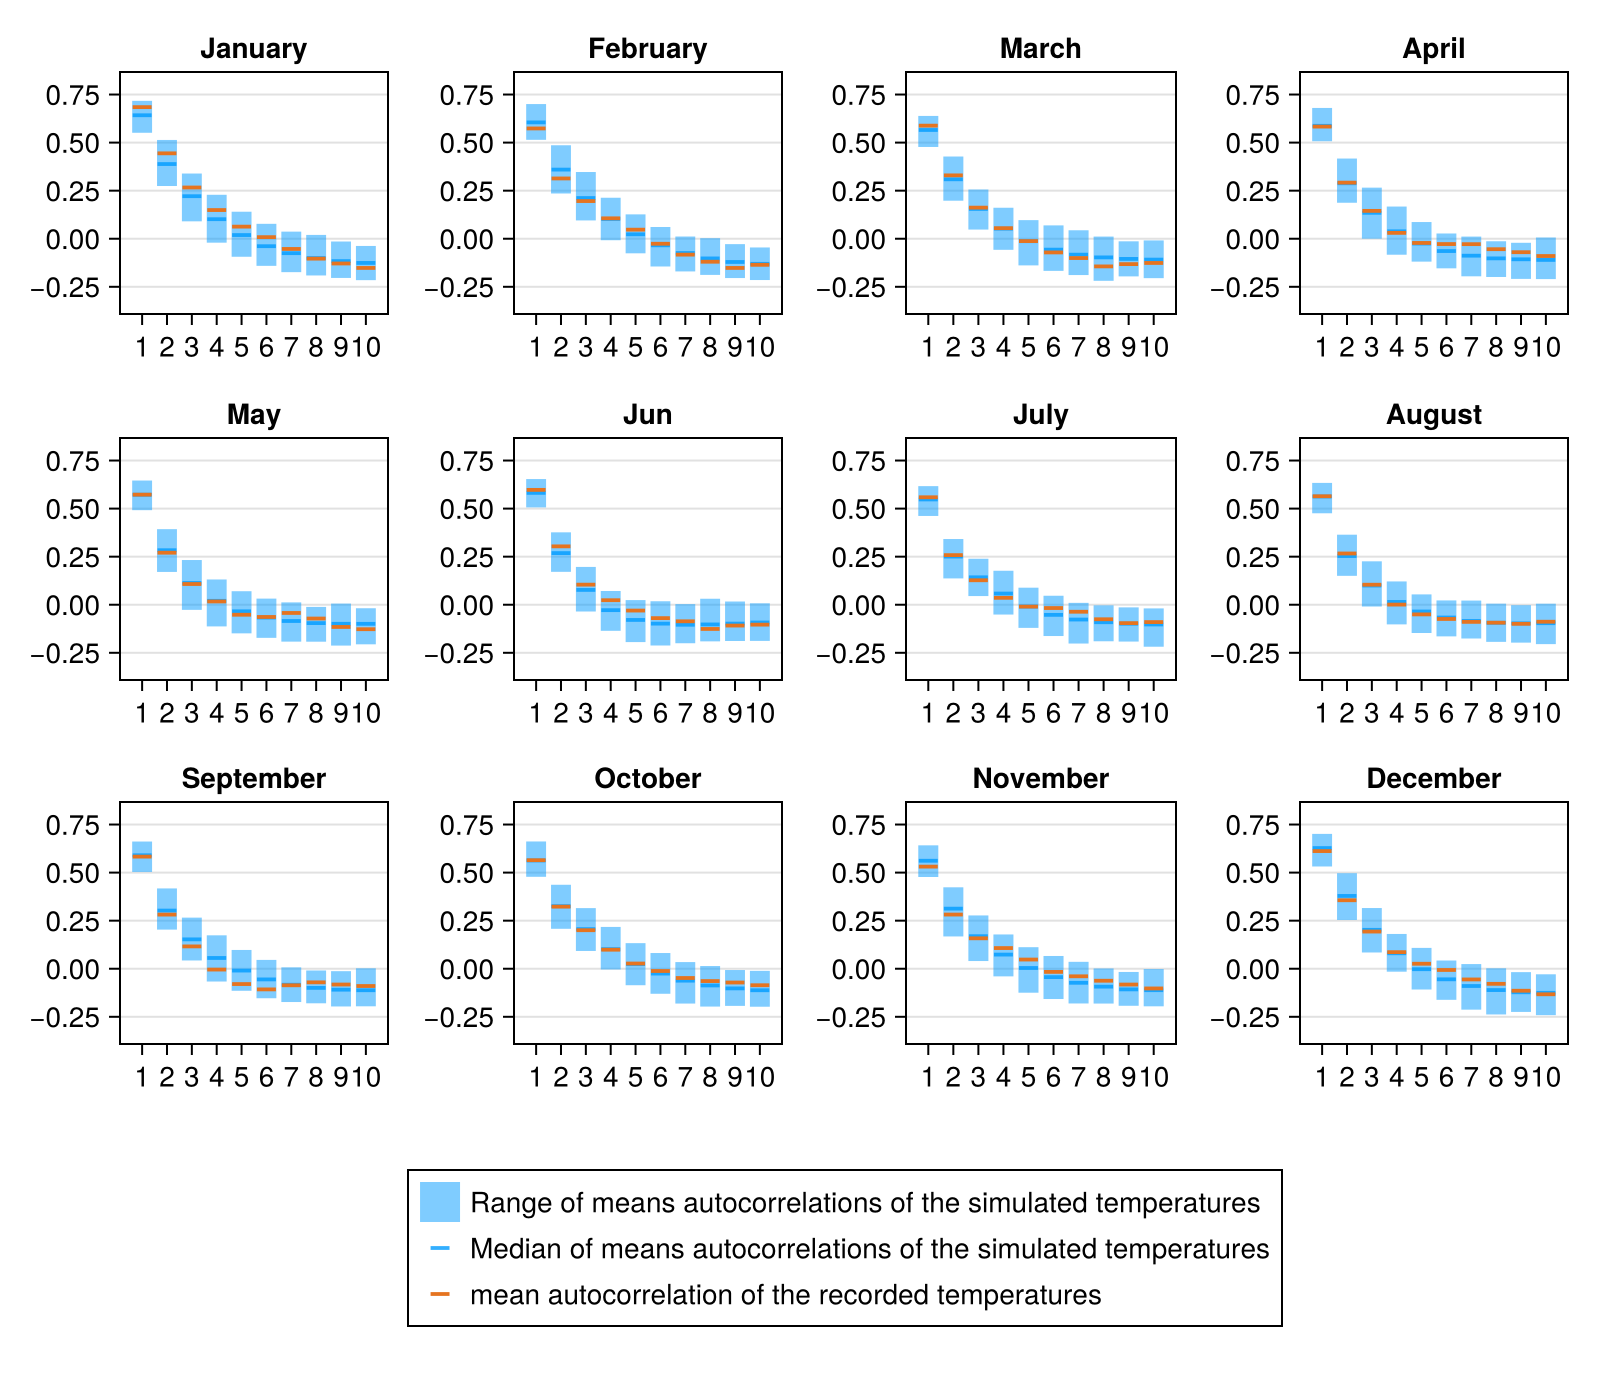

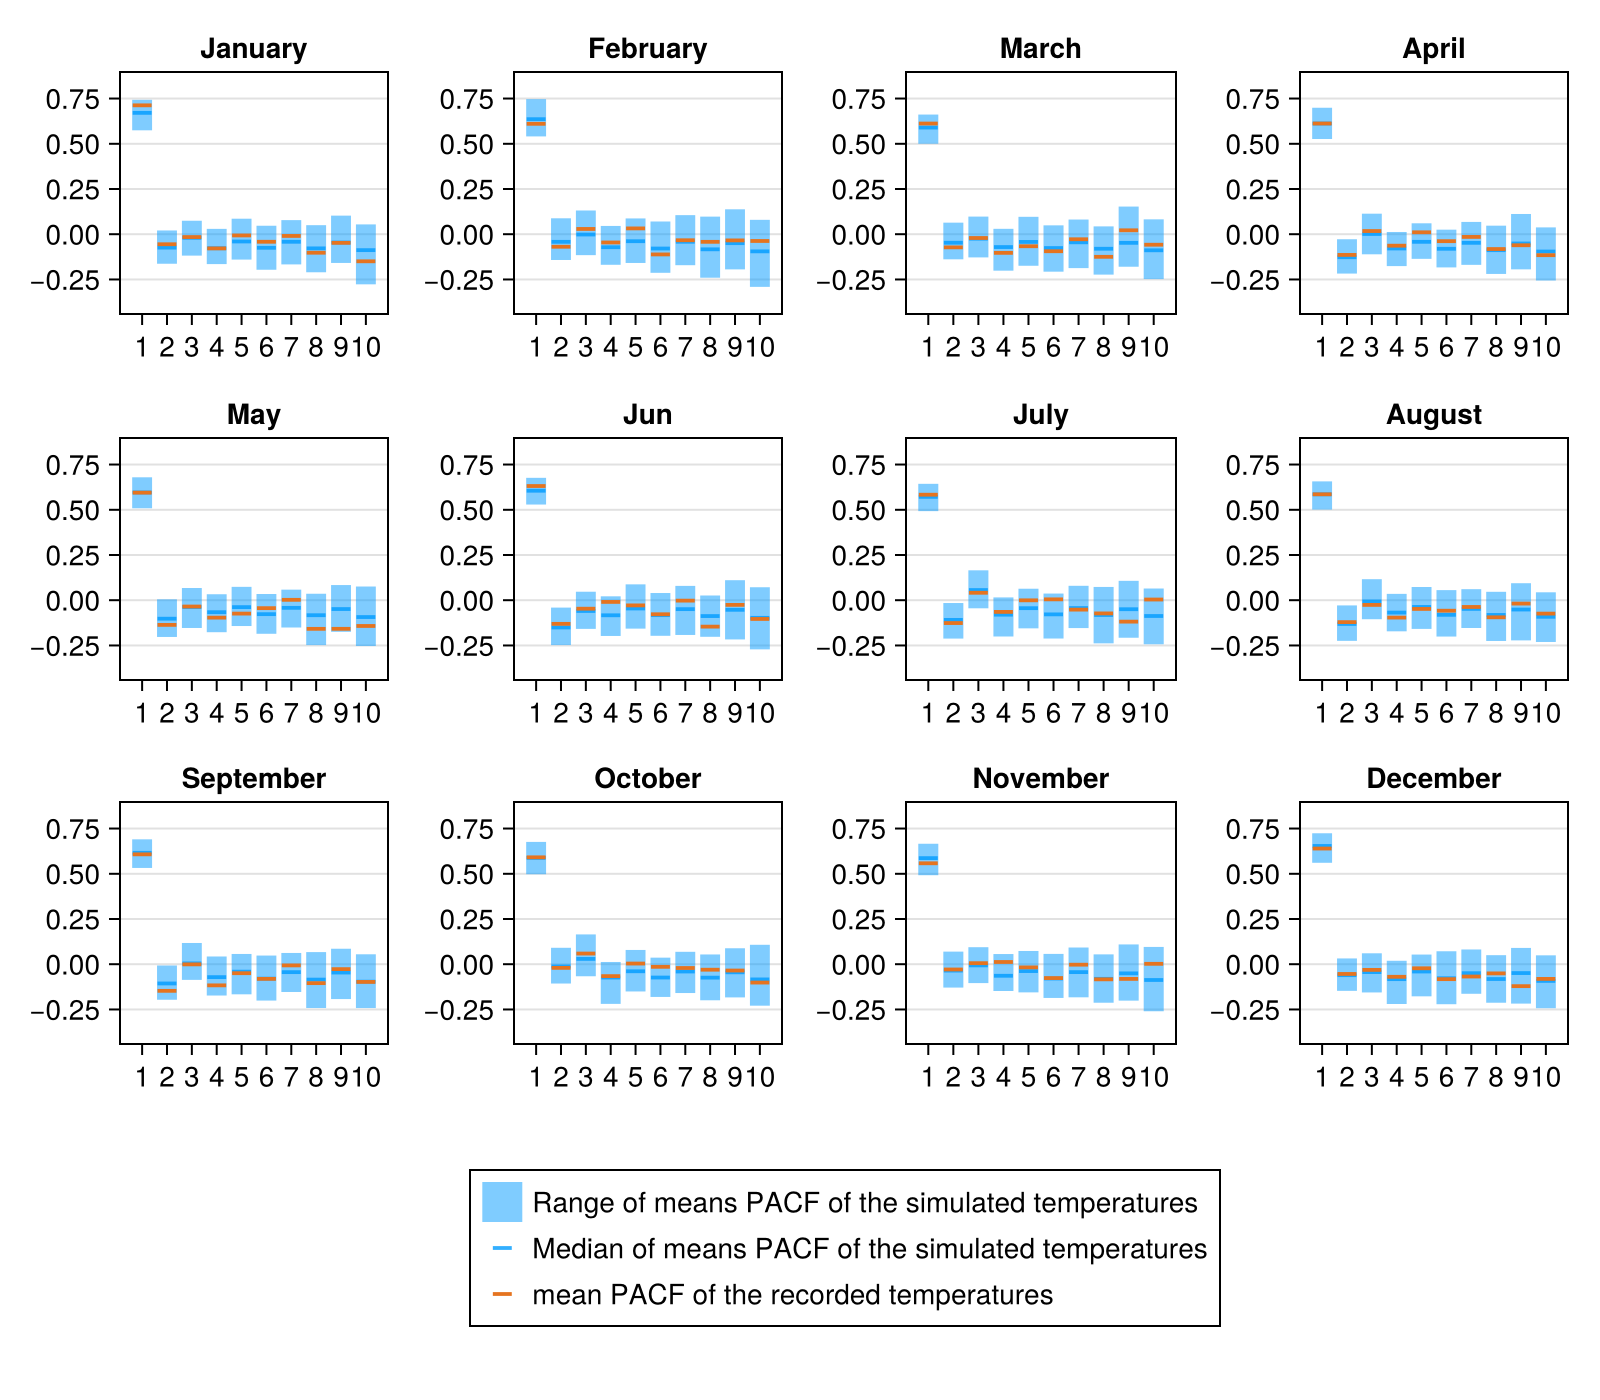

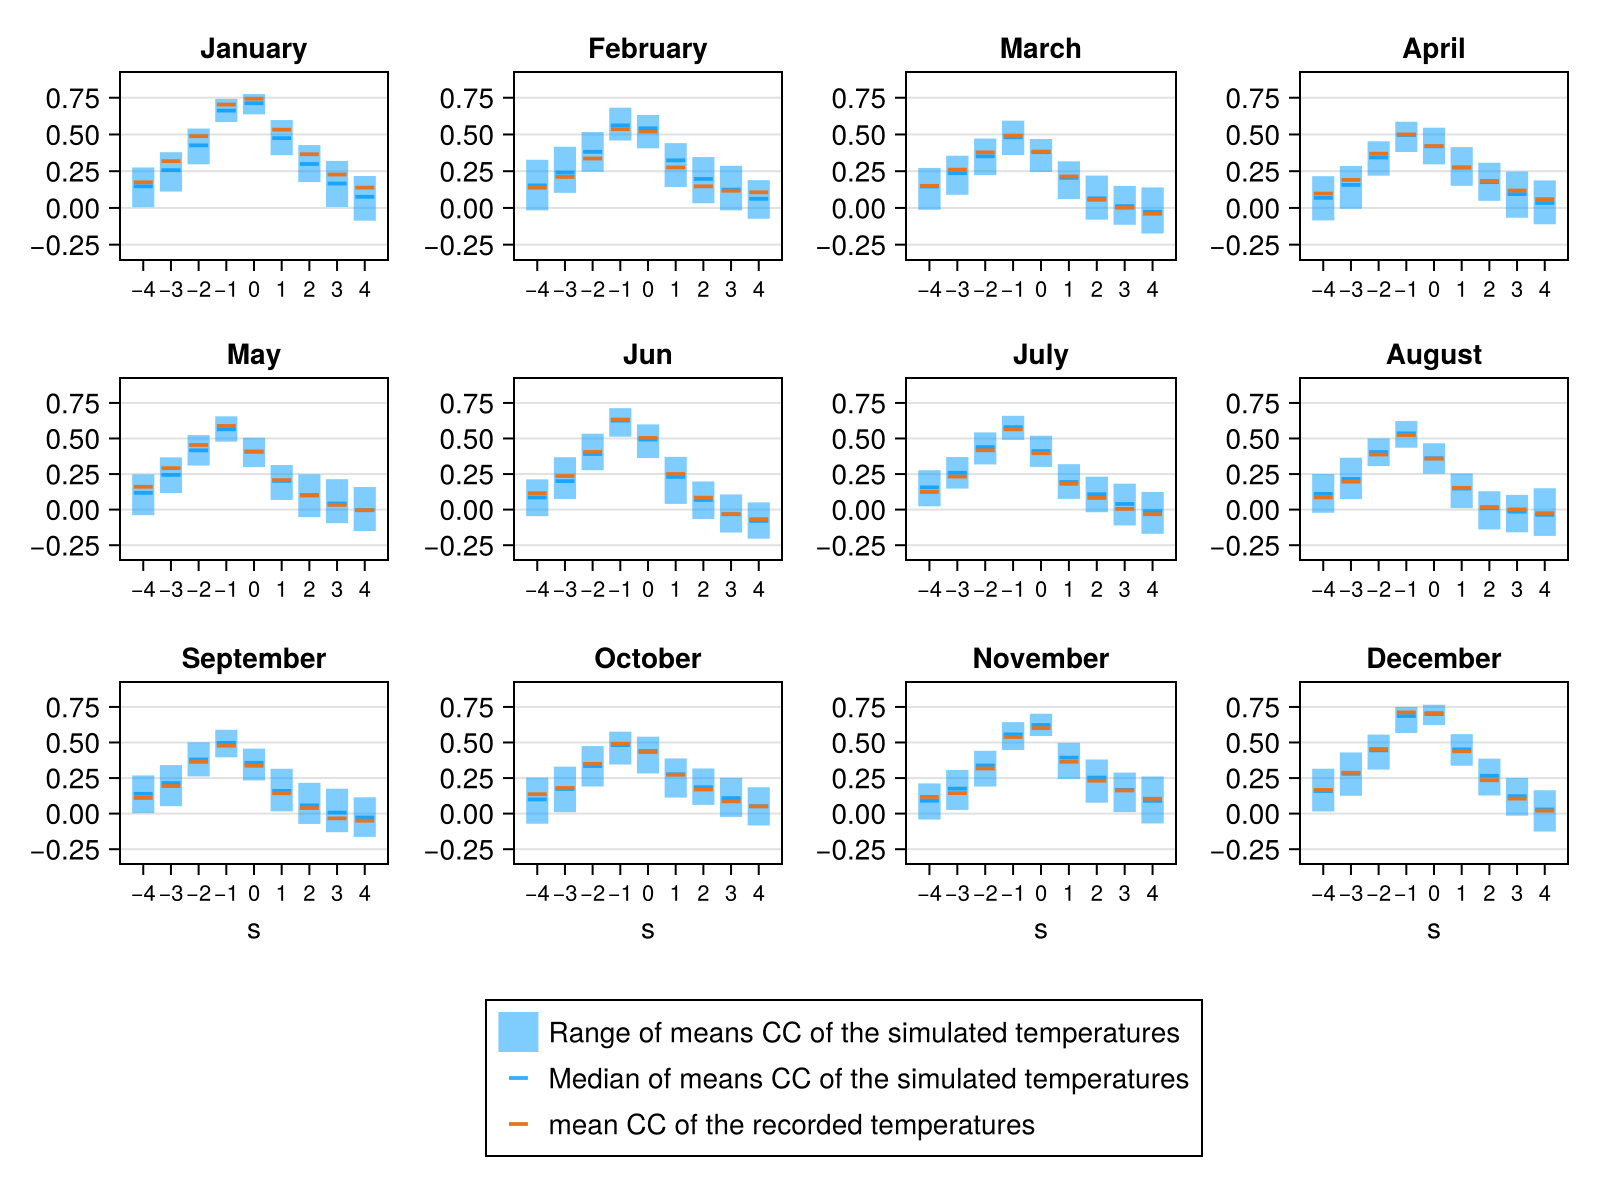

Number of scenarios with dates where TN > TX 0
Percentage of scenarios with dates where TN > TX 0.0 %
Mean percentage of dates where TN > TX : 0.0 %
Median percentage of dates where TN > TX : 0.0 %


In [10]:
include("utils/Plotting.jl")
fig_tuple = Sample_diagnostic(sample_, Caracteristics_Series_vec, Model, folder=folder_results, settings=settings, TG_bool=false, size = (1100,1250))
display.(fig_tuple)
println("Number of scenarios with dates where TN > TX $(sum(TN_Grt_TX.(sample_) .> 0))")
println("Percentage of scenarios with dates where TN > TX $(trunc(100*sum(TN_Grt_TX.(sample_) .> 0)/length(sample_),digits=2)) %")
println("Mean percentage of dates where TN > TX : $(trunc(100*mean(TN_Grt_TX.(sample_))/length(Model.date_vec),digits=2)) %")
println("Median percentage of dates where TN > TX : $(trunc(100*median(TN_Grt_TX.(sample_))/length(Model.date_vec),digits=2)) %")

Pour le premiers graphes (en haut à gauche) différences expliquées par les corrections